# R for Data Science Meeting 4 (6/15/22)

Welcome to the fourth class in the R for Data Science Summer Series, developed for the Walton Lab! In this meeting, we will primarily be working on data reshaping with tidyr(). We will also briefly review last week's meeting.

Learning Objectives:

Review last weeks meeting (data manipulation with dplyr + exercise). 12:00-12:15.
Apply tidyr() functions to reshape data in R:
gather().                                                            12:15-12:25.
spread().                                                            12:25-12:30.
separate().                                                          12:30-12:35.
unite().                                                             12:35-12:40.
arrange() & rename().                                                12:40-12:45.

Check out the dplyr() + tidyr() cheatsheet: https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf

As a supplementary resource, please see the R for Data Science book by Hadley Wickham (https://r4ds.had.co.nz/index.html). We will not be directly using this book for meetings, but it will prove to be a handy resource as you continue down the path of data science.

Also, I'm giving credit to Bradley Boehmke (https://uc-r.github.io/tidyr) for their tidyr() lesson.

## Review of Last Week's Meeting

In [1]:
# load packages into our environment
library(data.table)
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# load in behavioral dataset
dats.ppi <- fread("../data/ppi_3.8.22.csv")
head(dats.ppi)

file.name               experiment.name  schedule.file         ToneFreq
1 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
2 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
3 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
4 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
5 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
6 09242020_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
  FloordB protocol  animal.id Strain  awt_months awt_days ⋯ method
1 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
2 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
3 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
4 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
5 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
6 65      10APTPSIN 1283      CBA/CaJ 24         739      ⋯ final 
  metric                   N.ref.startles N.inhib.startles N.ref.nonstartles
1 metric.pos.peak.amp.filt 54             48                6               
2 metric.pos.peak.amp.filt 54             54                6               
3 metric.pos.peak.amp.filt 54             52                6               
4 metric.pos.peak.amp.filt 54             50                6               
5 metric.pos.peak.amp.filt 54             50                6               
6 metric.pos.peak.amp.filt  8              4               52               
  N.inhib.nonstartles per.startles.ref per.startles.inhib mean.metric.ref
1 12                  0.9000000        0.80000000         0.016916458    
2  6                  0.9000000        0.90000000         0.016916458    
3  8                  0.9000000        0.86666667         0.016916458    
4 10                  0.9000000        0.83333333         0.016916458    
5 10                  0.9000000        0.83333333         0.016916458    
6 56                  0.1333333        0.06666667         0.008920707    
  mean.metric.inhib
1 0.013293458      
2 0.017494895      
3 0.021425816      
4 0.018320830      
5 0.017061413      
6 0.006995507

### select()

In [3]:
# use select() to select columns of interest
select(head(dats.ppi), animal.id, Strain, Sex, awt_months)

animal.id Strain  Sex awt_months
1 1283      CBA/CaJ M   24        
2 1283      CBA/CaJ M   24        
3 1283      CBA/CaJ M   24        
4 1283      CBA/CaJ M   24        
5 1283      CBA/CaJ M   24        
6 1283      CBA/CaJ M   24

### filter()

In [4]:
# use filter() to select observations (rows) of interest
filter(dats.ppi, per.startles.inhib > 0.9 & awt_months == 20 & ToneFreq == 8000)

file.name              experiment.name  schedule.file         ToneFreq
1   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
2   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
3   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
4   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
5   07282021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
6   07302021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
7   07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
8   07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
9   07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
10  07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
11  07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
12  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
13  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
14  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
15  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
16  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
17  07302021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
18  07302021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
19  07302021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
20  08022021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
21  08022021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
22  08022021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
23  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
24  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
25  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
26  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
27  07282021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
28  07262021_8TPSIN_1741   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
29  07262021_8TPSIN_1741   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
30  07262021_8TPSIN_1741   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
⋮   ⋮                      ⋮                ⋮                     ⋮       
110 08262021_8APTPSIN_1760 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
111 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
112 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
113 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
114 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
115 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
116 09242021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
117 09202021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
118 09202021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
119 09202021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
120 09222021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
121 09242021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
122 09242021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
123 09272021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
124 09292021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
125 09292021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
126 09292021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
127 09292021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
128 09292021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
129 09202021_8TPSIN_1769   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
130 09222021_8TPSIN_1769   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
131 09202021_8APTPSIN_1769 To

In [5]:
# use a pipe to pass a function onto a data frame
dats.ppi %>% filter(awt_months == 20)

file.name              experiment.name schedule.file         ToneFreq
1    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
2    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
3    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
4    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
5    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
6    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
7    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
8    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
9    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
10   06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
11   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
12   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
13   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
14   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
15   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
16   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
17   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
18   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
19   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
20   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
21   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
22   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
23   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
24   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
25   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
26   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
27   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
28   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
29   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
30   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
⋮    ⋮                      ⋮               ⋮                     ⋮       
4978 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4979 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4980 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4981 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4982 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4983 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4984 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4985 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4986 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4987 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4988 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4989 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4990 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4991 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4992 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4993 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4994 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4995 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4996 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4997 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4998 10202021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4999 10202021_20NBPSIN_1828 NB

### Pipes (%>%)

In [6]:
# pass select and filter onto the data at the same time
dats.ppi %>%
    select(animal.id, Strain, Sex, awt_months) %>%
    filter(awt_months == 20) %>%
    head()

animal.id Strain  Sex awt_months
1 1312      CBA/CaJ F   20        
2 1312      CBA/CaJ F   20        
3 1312      CBA/CaJ F   20        
4 1312      CBA/CaJ F   20        
5 1312      CBA/CaJ F   20        
6 1312      CBA/CaJ F   20

### mutate()

In [7]:
# use mutate() to create a new column of startle rates in percentage rather than ratio
dats.ppi %>%
    mutate(per.startles.ref = per.startles.ref * 100,
           per.startles.inhib = per.startles.inhib * 100)

file.name                experiment.name  schedule.file                
1     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
2     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
3     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
4     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
5     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
6     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
7     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
8     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
9     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
10    09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
13    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
14    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
15    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
16    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
17    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
18    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
19    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
20    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
21    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
22    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
23    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
24    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
29    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
30    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
⋮     ⋮                        ⋮                ⋮                            
81844 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81845 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81846 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81847 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81848 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81849 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81850 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81851 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81852 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81853 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81854 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81855 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81856 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81857 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81858 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81859 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81860 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81861 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81862 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81863 10052021_20NBPSIN_1711

### Split-Apply-Combine (group_by() and summarize())

In [15]:
# use group_by() and summarize() to view the mean.ppi and startle rate
# for each animal.id, also grouped by frequency
dats.ppi %>%
    group_by(animal.id, ToneFreq) %>%
    summarize(mean.ppi = mean(ppi.std, na.rm = TRUE),
              mean.startle.rate.ref = mean(per.startles.ref)) %>%
    head()

`summarise()` has grouped output by 'animal.id'. You can override using the `.groups` argument.



animal.id ToneFreq mean.ppi   mean.startle.rate.ref
1 1283      10000    -0.4107230 0.6047619            
2 1283      16000     0.1136071 0.5393939            
3 1283      24000    -1.3081862 0.2888889            
4 1285      10000     0.3269551 0.7857143            
5 1285      16000     0.5134324 0.8121212            
6 1285      24000     0.3226996 0.4777778

In [16]:
# convert tibble back to data table in the same dplyr chain
dats.ppi %>%
    group_by(animal.id, ToneFreq) %>%
    summarize(mean.ppi = mean(ppi.std, na.rm = TRUE),
              mean.startle.rate.ref = mean(per.startles.ref)) %>%
    as.data.table() %>%
    head()

`summarise()` has grouped output by 'animal.id'. You can override using the `.groups` argument.



animal.id ToneFreq mean.ppi   mean.startle.rate.ref
1 1283      10000    -0.4107230 0.6047619            
2 1283      16000     0.1136071 0.5393939            
3 1283      24000    -1.3081862 0.2888889            
4 1285      10000     0.3269551 0.7857143            
5 1285      16000     0.5134324 0.8121212            
6 1285      24000     0.3226996 0.4777778

## Manipulate a Behavioral Dataset

Now that we have the basics of dplyr() down, let's work together to perform some manipulation on a behavioral dataset.

In [28]:
dats.ppi %>%
    filter(awt_months %in% c(10:18))

file.name                experiment.name  schedule.file                
1     10062020_10TPSIN_1439    Tone-PPI         Tone-PPI_10K_SIN.srsf        
2     10062020_10TPSIN_1439    Tone-PPI         Tone-PPI_10K_SIN.srsf        
3     10062020_10TPSIN_1439    Tone-PPI         Tone-PPI_10K_SIN.srsf        
4     10062020_10TPSIN_1439    Tone-PPI         Tone-PPI_10K_SIN.srsf        
5     10062020_10TPSIN_1439    Tone-PPI         Tone-PPI_10K_SIN.srsf        
6     10062020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
7     10062020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
8     10062020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
9     10062020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
10    10062020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    10082020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    10082020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
13    10082020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
14    10082020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
15    10082020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
16    10102020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
17    10102020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
18    10102020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
19    10102020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
20    10102020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
21    10132020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
22    10132020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
23    10132020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
24    10132020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
25    10132020_10APTPSIN_1439  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
26    10062020_16APTPCSIN_1439 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    10062020_16APTPCSIN_1439 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    10062020_16APTPCSIN_1439 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
29    10062020_16APTPCSIN_1439 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
30    10062020_16APTPCSIN_1439 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
⋮     ⋮                        ⋮                ⋮                            
20287 10042021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20288 10042021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20289 10042021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20290 10042021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20291 10042021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20292 10062021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20293 10062021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20294 10062021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20295 10062021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20296 10062021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20297 10082021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20298 10082021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20299 10082021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20300 10082021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20301 10082021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20302 10112021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20303 10112021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20304 10112021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20305 10112021_20NBPSIN_2133   NBPPI_20K_24K    SIN-NBPPI.srsf               
20306 10112021_20NBPSIN_2133

## Exercise 1: Reshaping with tidyr()

The tidyr() package contains functions that are extremely useful for changing the "shape" of data frames.

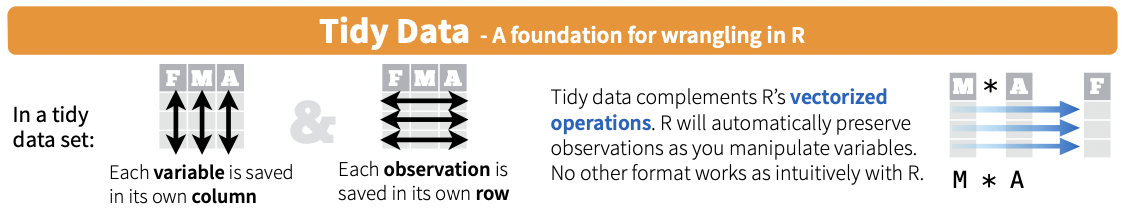

In [29]:
# load in walton lab abr vdt data
dats.abr <- fread("../data/walton_abr_data.csv")
head(dats.abr)

PI     ID   Sex DOB        ABR_Date   Age_Days Age_Weeks Age_Months Age_Group
1 Walton 1673 M   10/12/2019 12/2/2019  51       7         2          1        
2 Walton 1674 M   10/12/2019 12/12/2019 61       9         2          1        
3 Walton 1676 M   10/12/2019 12/12/2019 61       9         2          1        
4 Walton 1675 M   10/12/2019 12/13/2019 62       9         2          1        
5 Walton 1664 M   10/8/2019  12/11/2019 64       9         2          1        
6 Walton 1665 M   10/8/2019  12/11/2019 64       9         2          1        
  Freq3 ⋯ Change16  Change24   Change32   Change48 Changeall Change6_8
1 NA    ⋯ -8.173077 -5.7226562  -8.479167 NA       -6.11      -3.27   
2 NA    ⋯  1.826923 -0.7226562  -3.479167 NA       -4.11     -13.27   
3 NA    ⋯  1.826923 -0.7226562   6.520833 NA        0.89       1.73   
4 NA    ⋯ -3.173077 -5.7226562 -13.479167 NA       -8.11      -8.27   
5 NA    ⋯ -3.173077 -0.7226562   6.520833 NA       -0.11      -3.27   
6 NA    ⋯  6.826923  4.2773438   6.520833 NA        6.89       6.73   
  Change3_6_8 Change12_16 Change12_16_24 Change32_48
1  -3.27      NA          -6.26           -8.48     
2 -13.27      NA          -1.26           -3.48     
3   1.73      NA          -1.26            6.52     
4  -8.27      NA          -6.26          -13.48     
5  -3.27      NA          -1.26            6.52     
6   6.73      NA           7.07            6.52

In [30]:
# use print to see all columns
print(dats.abr)

         PI   ID Sex        DOB   ABR_Date Age_Days Age_Weeks Age_Months
  1: Walton 1673   M 10/12/2019  12/2/2019       51         7          2
  2: Walton 1674   M 10/12/2019 12/12/2019       61         9          2
  3: Walton 1676   M 10/12/2019 12/12/2019       61         9          2
  4: Walton 1675   M 10/12/2019 12/13/2019       62         9          2
  5: Walton 1664   M  10/8/2019 12/11/2019       64         9          2
 ---                                                                    
601: Walton  643   F   3/1/2016  10/3/2018      946       135         31
602: Walton  644   F   3/1/2016  10/3/2018      946       135         31
603: Walton  645   F   3/1/2016  10/4/2018      947       135         31
604: Walton 1269   F  7/10/2018  4/15/2021     1010       144         33
605: Walton  643   F   3/1/2016  1/10/2019     1045       149         34
     Age_Group Freq3 Freq6 Freq8 Freq12 Freq16 Freq24 Freq32 Freq48 Change3
  1:         1    NA    NA    25     15     10  

The dats.abr data frame we loaded in is considered wide, as there are several columns that actually represent levels of a variable, such as frequency. The columns named "Freq3", "Freq6", etc., are representing VDTs collected at those frequencies. Although the format of this data might be sufficient for manipulating outside of R, it breaks the "tidy" rule of R: each variable saved in its own column and each observation saved in its own row.

This problem is exemplified when we try to plot (although the same issues would arise when performing other operations). However, typically data in this format is useful for visualizing counts.

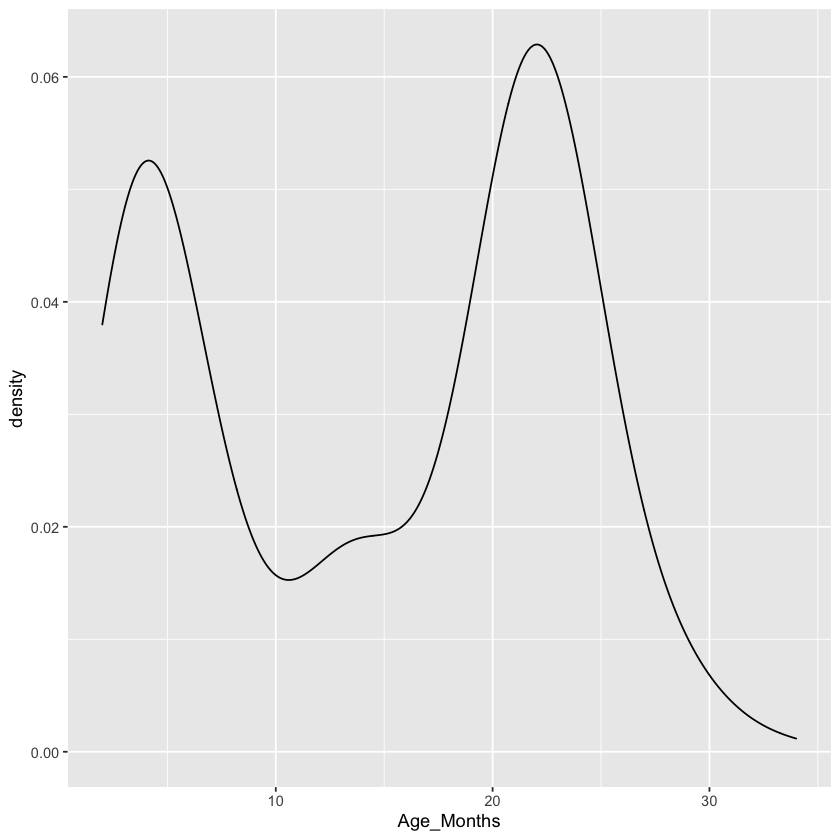

In [31]:
# plot the "wide" dats.abr dataset
# what would we choose as an x variable?
# we can go with any variable we want, but what would the y variable be?
# difficult to think about a meaningful 2-dimensional plot with this data
# we can look at counts of a variable

dats.abr %>%
    ggplot(aes(Age_Months)) +
    geom_density()

# but with a wide dataset we are limited in terms of what we can plot.

### gather()

gather() reshapes from a wide format into a long format. There are times when our data is considered unstacked and a common attribute of concern is spread out across columns. To reformat the data such that these common attributes are gathered together as a single variable, the gather() function will take multiple columns and collapse them into key-value pairs, duplicating all other columns as needed.

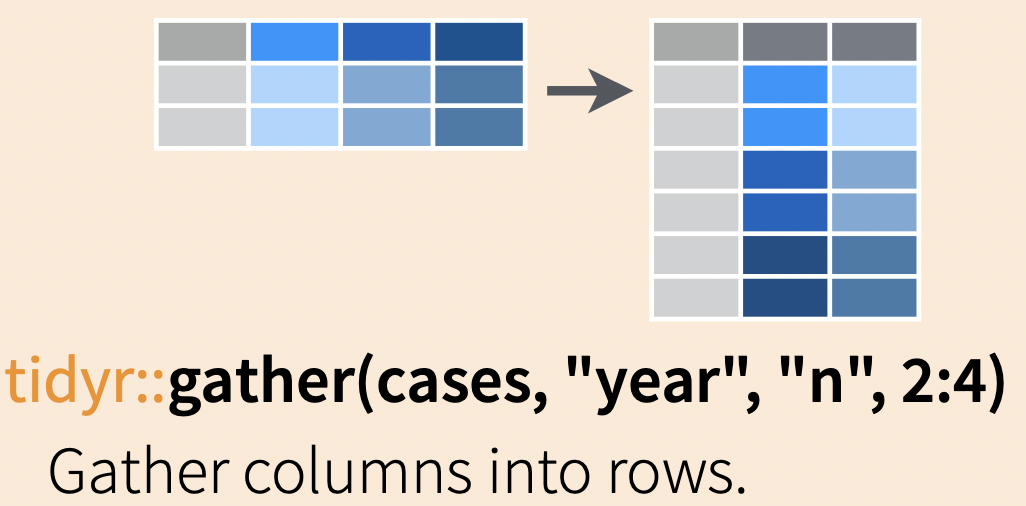

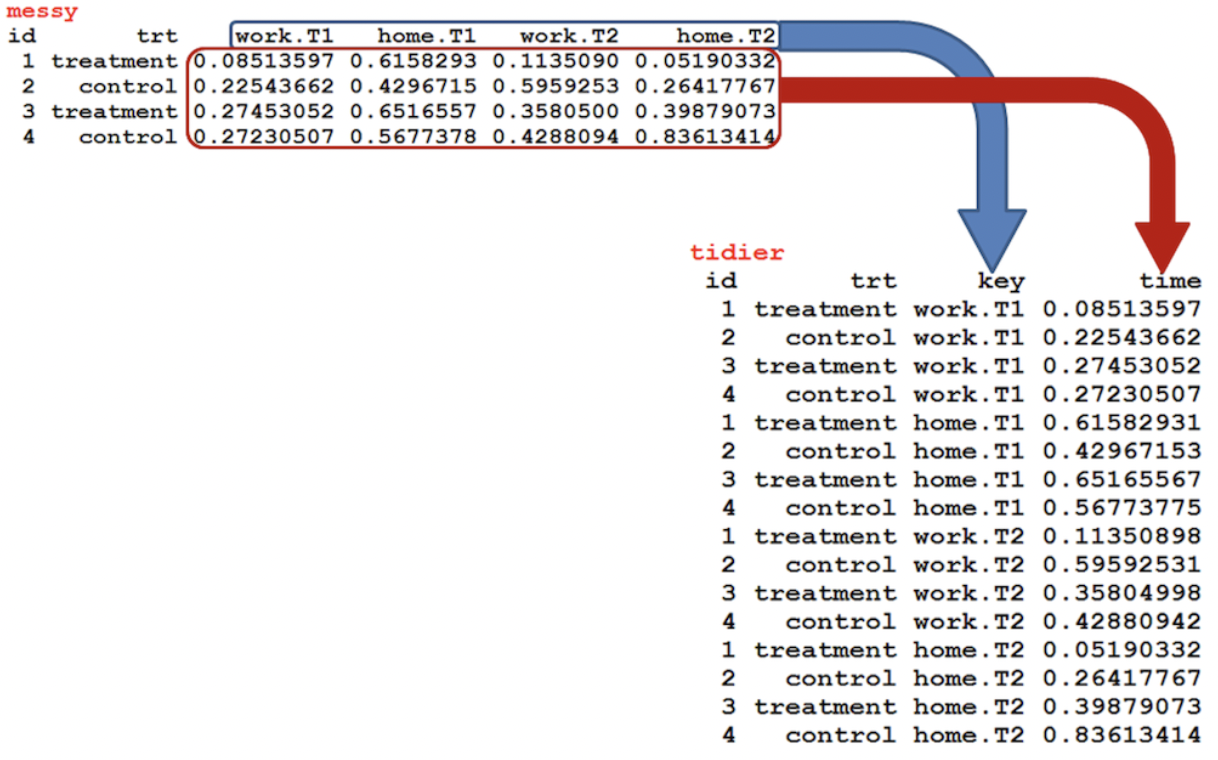

In [33]:
# view dats.abr for comparison
head(dats.abr)

# convert dats.abr from wide to long using gather()
# transform frequency levels into one column, with vdts into another
dats.abr.long <- dats.abr %>%
    gather(key = Frequency, value = VDT, Freq3:Freq48, na.rm = TRUE)

head(dats.abr.long)

PI     ID   Sex DOB        ABR_Date   Age_Days Age_Weeks Age_Months Age_Group
1 Walton 1673 M   10/12/2019 12/2/2019  51       7         2          1        
2 Walton 1674 M   10/12/2019 12/12/2019 61       9         2          1        
3 Walton 1676 M   10/12/2019 12/12/2019 61       9         2          1        
4 Walton 1675 M   10/12/2019 12/13/2019 62       9         2          1        
5 Walton 1664 M   10/8/2019  12/11/2019 64       9         2          1        
6 Walton 1665 M   10/8/2019  12/11/2019 64       9         2          1        
  Freq3 ⋯ Change16  Change24   Change32   Change48 Changeall Change6_8
1 NA    ⋯ -8.173077 -5.7226562  -8.479167 NA       -6.11      -3.27   
2 NA    ⋯  1.826923 -0.7226562  -3.479167 NA       -4.11     -13.27   
3 NA    ⋯  1.826923 -0.7226562   6.520833 NA        0.89       1.73   
4 NA    ⋯ -3.173077 -5.7226562 -13.479167 NA       -8.11      -8.27   
5 NA    ⋯ -3.173077 -0.7226562   6.520833 NA       -0.11      -3.27   
6 NA    ⋯  6.826923  4.2773438   6.520833 NA        6.89       6.73   
  Change3_6_8 Change12_16 Change12_16_24 Change32_48
1  -3.27      NA          -6.26           -8.48     
2 -13.27      NA          -1.26           -3.48     
3   1.73      NA          -1.26            6.52     
4  -8.27      NA          -6.26          -13.48     
5  -3.27      NA          -1.26            6.52     
6   6.73      NA           7.07            6.52

PI     ID   Sex DOB        ABR_Date   Age_Days Age_Weeks Age_Months
1211 Walton 1673 M   10/12/2019 12/2/2019  51       7         2         
1212 Walton 1674 M   10/12/2019 12/12/2019 61       9         2         
1213 Walton 1676 M   10/12/2019 12/12/2019 61       9         2         
1214 Walton 1675 M   10/12/2019 12/13/2019 62       9         2         
1215 Walton 1664 M   10/8/2019  12/11/2019 64       9         2         
1216 Walton 1665 M   10/8/2019  12/11/2019 64       9         2         
     Age_Group Change3 ⋯ Change32   Change48 Changeall Change6_8 Change3_6_8
1211 1         NA      ⋯  -8.479167 NA       -6.11      -3.27     -3.27     
1212 1         NA      ⋯  -3.479167 NA       -4.11     -13.27    -13.27     
1213 1         NA      ⋯   6.520833 NA        0.89       1.73      1.73     
1214 1         NA      ⋯ -13.479167 NA       -8.11      -8.27     -8.27     
1215 1         NA      ⋯   6.520833 NA       -0.11      -3.27     -3.27     
1216 1         NA      ⋯   6.520833 NA        6.89       6.73      6.73     
     Change12_16 Change12_16_24 Change32_48 Frequency VDT
1211 NA          -6.26           -8.48      Freq8     25 
1212 NA          -1.26           -3.48      Freq8     15 
1213 NA          -1.26            6.52      Freq8     30 
1214 NA          -6.26          -13.48      Freq8     20 
1215 NA          -1.26            6.52      Freq8     25 
1216 NA           7.07            6.52      Freq8     35

Now the data frame has a column for the frequency the ABR was run at, along with a separate column that contains the VDT for that condition.

Now we can plot the relationship between two variables:

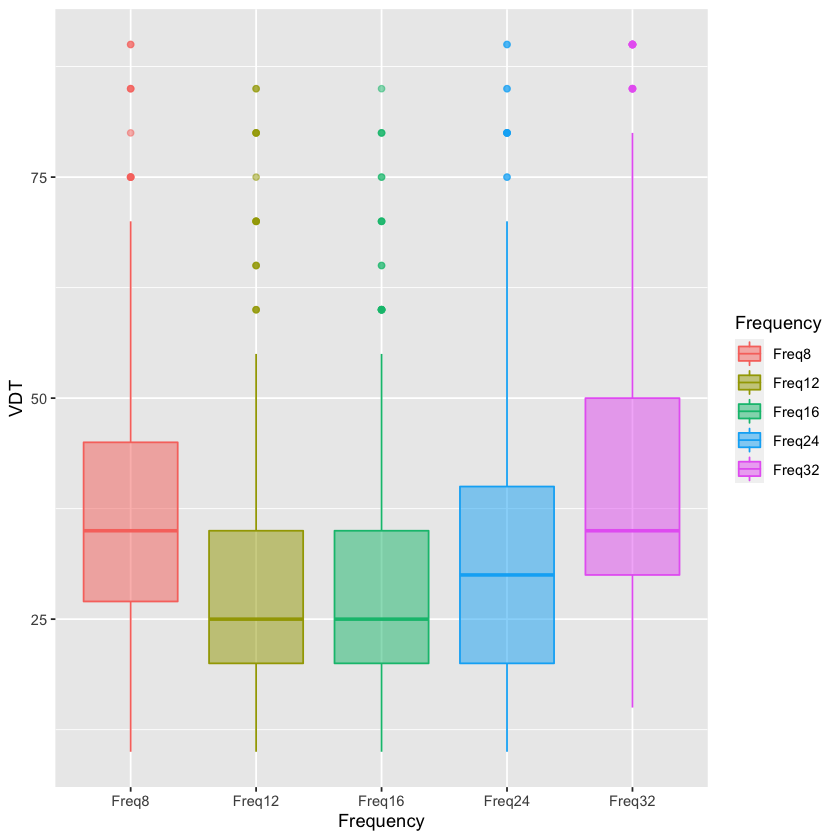

In [34]:
# plot vdt as a function of frequency
# (also correctly ordering frequencies as factors)

dats.abr.long %>%
    mutate(Frequency = factor(Frequency, levels = 
                             c("Freq8", "Freq12", "Freq16",
                             "Freq24", "Freq32"))) %>%
    ggplot(aes(Frequency, VDT, fill = Frequency, color = Frequency)) +
    geom_boxplot(alpha = 0.5)

### spread()

spread() reshapes from a long format into a wide format. There are times when we are required to turn long formatted data into wide formatted data. The spread() function spreads a key-value pair across multiple columns.

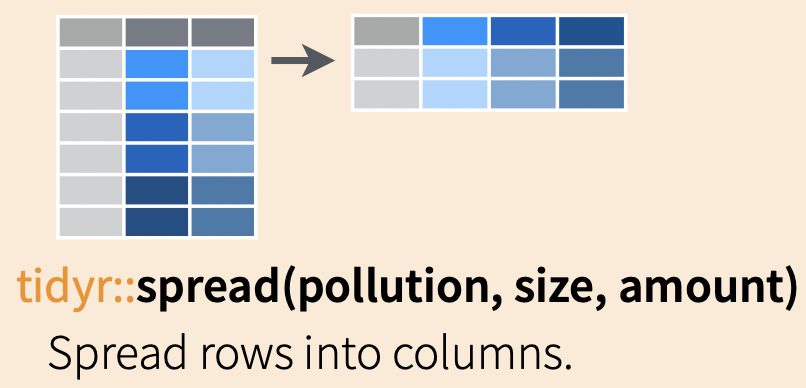

In [35]:
# view dats.ppi for comparison
head(dats.ppi)

# convert dats.ppi from long to wide using spread()
# transform frequency levels into their own columns, with ppi as the
# values of those columns
dats.ppi.wide <- dats.ppi %>% 
    spread(ToneFreq, ppi.std)

head(dats.ppi.wide)

file.name               experiment.name  schedule.file         ToneFreq
1 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
2 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
3 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
4 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
5 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
6 09242020_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
  FloordB protocol  animal.id Strain  awt_months awt_days ⋯ method
1 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
2 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
3 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
4 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
5 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
6 65      10APTPSIN 1283      CBA/CaJ 24         739      ⋯ final 
  metric                   N.ref.startles N.inhib.startles N.ref.nonstartles
1 metric.pos.peak.amp.filt 54             48                6               
2 metric.pos.peak.amp.filt 54             54                6               
3 metric.pos.peak.amp.filt 54             52                6               
4 metric.pos.peak.amp.filt 54             50                6               
5 metric.pos.peak.amp.filt 54             50                6               
6 metric.pos.peak.amp.filt  8              4               52               
  N.inhib.nonstartles per.startles.ref per.startles.inhib mean.metric.ref
1 12                  0.9000000        0.80000000         0.016916458    
2  6                  0.9000000        0.90000000         0.016916458    
3  8                  0.9000000        0.86666667         0.016916458    
4 10                  0.9000000        0.83333333         0.016916458    
5 10                  0.9000000        0.83333333         0.016916458    
6 56                  0.1333333        0.06666667         0.008920707    
  mean.metric.inhib
1 0.013293458      
2 0.017494895      
3 0.021425816      
4 0.018320830      
5 0.017061413      
6 0.006995507

file.name               experiment.name  schedule.file         FloordB
1 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 65     
2 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 65     
3 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 65     
4 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 65     
5 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 65     
6 09242020_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 65     
  protocol  animal.id Strain  awt_months awt_days Sex ⋯ per.startles.inhib
1 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ 0.80000000        
2 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ 0.90000000        
3 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ 0.86666667        
4 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ 0.83333333        
5 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ 0.83333333        
6 10APTPSIN 1283      CBA/CaJ 24         739      M   ⋯ 0.06666667        
  mean.metric.ref mean.metric.inhib 8000 10000        16000 20000 24000 32000
1 0.016916458     0.013293458       NA    0.214170115 NA    NA    NA    NA   
2 0.016916458     0.017494895       NA   -0.034193761 NA    NA    NA    NA   
3 0.016916458     0.021425816       NA   -0.266566333 NA    NA    NA    NA   
4 0.016916458     0.018320830       NA   -0.083018102 NA    NA    NA    NA   
5 0.016916458     0.017061413       NA   -0.008568883 NA    NA    NA    NA   
6 0.008920707     0.006995507       NA    0.215812531 NA    NA    NA    NA   
  <NA>
1 NA  
2 NA  
3 NA  
4 NA  
5 NA  
6 NA

Typically this data format is most useful for viewing counts of a certain value of a variable or grouping of variables.

### separate()

separate() splits a single variable into multiple variables. Many times a single column variable will capture multiple variables, or even parts of a variable you just don’t care about. In each of these cases, our objective may be to separate characters within the variable string. This can be accomplished using the separate() function which turns a single character column into multiple columns.

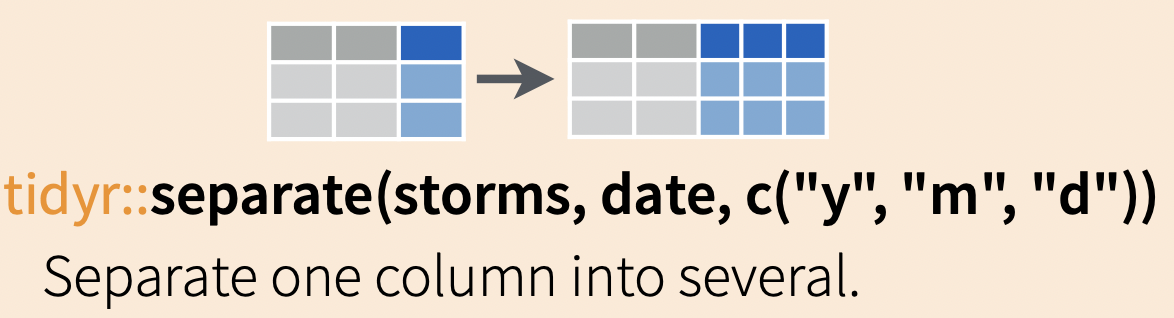

In [37]:
# view dats.ppi for comparison
head(dats.ppi)

# create separate columns based off the file.name variable in dats.ppi
dats.ppi %>%
    separate(file.name, c("date", "protocol", "animal.id")) %>%
    head()

# separate automatically knows what to separate by (_, in this case)

file.name               experiment.name  schedule.file         ToneFreq
1 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
2 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
3 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
4 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
5 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
6 09242020_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
  FloordB protocol  animal.id Strain  awt_months awt_days ⋯ method
1 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
2 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
3 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
4 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
5 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
6 65      10APTPSIN 1283      CBA/CaJ 24         739      ⋯ final 
  metric                   N.ref.startles N.inhib.startles N.ref.nonstartles
1 metric.pos.peak.amp.filt 54             48                6               
2 metric.pos.peak.amp.filt 54             54                6               
3 metric.pos.peak.amp.filt 54             52                6               
4 metric.pos.peak.amp.filt 54             50                6               
5 metric.pos.peak.amp.filt 54             50                6               
6 metric.pos.peak.amp.filt  8              4               52               
  N.inhib.nonstartles per.startles.ref per.startles.inhib mean.metric.ref
1 12                  0.9000000        0.80000000         0.016916458    
2  6                  0.9000000        0.90000000         0.016916458    
3  8                  0.9000000        0.86666667         0.016916458    
4 10                  0.9000000        0.83333333         0.016916458    
5 10                  0.9000000        0.83333333         0.016916458    
6 56                  0.1333333        0.06666667         0.008920707    
  mean.metric.inhib
1 0.013293458      
2 0.017494895      
3 0.021425816      
4 0.018320830      
5 0.017061413      
6 0.006995507

date     protocol  animal.id experiment.name  schedule.file         ToneFreq
1 092220   10APTPSIN 1283      Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
2 092220   10APTPSIN 1283      Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
3 092220   10APTPSIN 1283      Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
4 092220   10APTPSIN 1283      Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
5 092220   10APTPSIN 1283      Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
6 09242020 10APTPSIN 1283      Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
  FloordB Strain  awt_months awt_days ⋯ method metric                  
1 65      CBA/CaJ 24         737      ⋯ final  metric.pos.peak.amp.filt
2 65      CBA/CaJ 24         737      ⋯ final  metric.pos.peak.amp.filt
3 65      CBA/CaJ 24         737      ⋯ final  metric.pos.peak.amp.filt
4 65      CBA/CaJ 24         737      ⋯ final  metric.pos.peak.amp.filt
5 65      CBA/CaJ 24         737      ⋯ final  metric.pos.peak.amp.filt
6 65      CBA/CaJ 24         739      ⋯ final  metric.pos.peak.amp.filt
  N.ref.startles N.inhib.startles N.ref.nonstartles N.inhib.nonstartles
1 54             48                6                12                 
2 54             54                6                 6                 
3 54             52                6                 8                 
4 54             50                6                10                 
5 54             50                6                10                 
6  8              4               52                56                 
  per.startles.ref per.startles.inhib mean.metric.ref mean.metric.inhib
1 0.9000000        0.80000000         0.016916458     0.013293458      
2 0.9000000        0.90000000         0.016916458     0.017494895      
3 0.9000000        0.86666667         0.016916458     0.021425816      
4 0.9000000        0.83333333         0.016916458     0.018320830      
5 0.9000000        0.83333333         0.016916458     0.017061413      
6 0.1333333        0.06666667         0.008920707     0.006995507

### unite()

unite() merges multiple variables into one. There may be a time in which we would like to combine the values of two variables. The unite() function is a convenience function to paste together multiple variable values into one. In essence, it combines two variables of a single observation into one variable.

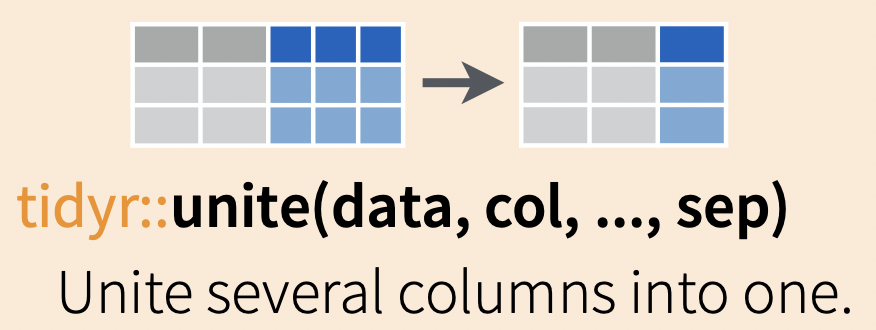

In [38]:
# view dats.ppi for comparison
head(dats.ppi)

# create single column containing ToneFreq and FloordB
dats.ppi %>%
    unite(Freq_Floor, ToneFreq, FloordB) %>%
    head()

file.name               experiment.name  schedule.file         ToneFreq
1 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
2 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
3 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
4 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
5 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
6 09242020_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000   
  FloordB protocol  animal.id Strain  awt_months awt_days ⋯ method
1 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
2 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
3 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
4 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
5 65      10APTPSIN 1283      CBA/CaJ 24         737      ⋯ final 
6 65      10APTPSIN 1283      CBA/CaJ 24         739      ⋯ final 
  metric                   N.ref.startles N.inhib.startles N.ref.nonstartles
1 metric.pos.peak.amp.filt 54             48                6               
2 metric.pos.peak.amp.filt 54             54                6               
3 metric.pos.peak.amp.filt 54             52                6               
4 metric.pos.peak.amp.filt 54             50                6               
5 metric.pos.peak.amp.filt 54             50                6               
6 metric.pos.peak.amp.filt  8              4               52               
  N.inhib.nonstartles per.startles.ref per.startles.inhib mean.metric.ref
1 12                  0.9000000        0.80000000         0.016916458    
2  6                  0.9000000        0.90000000         0.016916458    
3  8                  0.9000000        0.86666667         0.016916458    
4 10                  0.9000000        0.83333333         0.016916458    
5 10                  0.9000000        0.83333333         0.016916458    
6 56                  0.1333333        0.06666667         0.008920707    
  mean.metric.inhib
1 0.013293458      
2 0.017494895      
3 0.021425816      
4 0.018320830      
5 0.017061413      
6 0.006995507

file.name               experiment.name  schedule.file         Freq_Floor
1 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000_65  
2 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000_65  
3 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000_65  
4 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000_65  
5 092220_10APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000_65  
6 09242020_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf 10000_65  
  protocol  animal.id Strain  awt_months awt_days Sex ⋯ method
1 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ final 
2 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ final 
3 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ final 
4 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ final 
5 10APTPSIN 1283      CBA/CaJ 24         737      M   ⋯ final 
6 10APTPSIN 1283      CBA/CaJ 24         739      M   ⋯ final 
  metric                   N.ref.startles N.inhib.startles N.ref.nonstartles
1 metric.pos.peak.amp.filt 54             48                6               
2 metric.pos.peak.amp.filt 54             54                6               
3 metric.pos.peak.amp.filt 54             52                6               
4 metric.pos.peak.amp.filt 54             50                6               
5 metric.pos.peak.amp.filt 54             50                6               
6 metric.pos.peak.amp.filt  8              4               52               
  N.inhib.nonstartles per.startles.ref per.startles.inhib mean.metric.ref
1 12                  0.9000000        0.80000000         0.016916458    
2  6                  0.9000000        0.90000000         0.016916458    
3  8                  0.9000000        0.86666667         0.016916458    
4 10                  0.9000000        0.83333333         0.016916458    
5 10                  0.9000000        0.83333333         0.016916458    
6 56                  0.1333333        0.06666667         0.008920707    
  mean.metric.inhib
1 0.013293458      
2 0.017494895      
3 0.021425816      
4 0.018320830      
5 0.017061413      
6 0.006995507

### arrange()

arrange() orders rows by values of a column (either low to high or high to low).

In [39]:
# use arrange() to sort from low to high ppi (using select to make this operation clear)
# by default arrange() will sort in ascending
dats.ppi %>%
    select(animal.id, ppi.std) %>%
    arrange(ppi.std) %>%
    na.omit() %>%
    head()

# you can reverse the order to descending by wrapping the column in desc()
dats.ppi %>%
    select(animal.id, ppi.std) %>%
    arrange(desc(ppi.std)) %>%
    na.omit() %>%
    head()

animal.id ppi.std   
1 1505      -1348.7578
2 1519       -421.2857
3 2342       -397.9605
4 1505       -142.4195
5 1519       -123.8378
6 1479       -101.9817

animal.id ppi.std  
1 2300      0.9991475
2 2132      0.9988198
3 2061      0.9987687
4 2151      0.9987361
5 2193      0.9987198
6 2192      0.9986935

### rename()

rename() renames columns of a data frame.

In [40]:
# use rename() to rename the column "ppi.std" to "PPI".
# view dats.ppi for comparison
dats.ppi %>%
    select(animal.id, ppi.std) %>%
    head()

# now use rename()
dats.ppi %>%
    select(animal.id, ppi.std) %>%
    rename(PPI = ppi.std) %>%
    head()

animal.id ppi.std     
1 1283       0.214170115
2 1283      -0.034193761
3 1283      -0.266566333
4 1283      -0.083018102
5 1283      -0.008568883
6 1283       0.215812531

animal.id PPI         
1 1283       0.214170115
2 1283      -0.034193761
3 1283      -0.266566333
4 1283      -0.083018102
5 1283      -0.008568883
6 1283       0.215812531